# WEEK3 E2

# EXERCISE 2: Descriptive Analytics and Visualization 

In [43]:
import pandas as pd
df=pd.read_csv("bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


# 1.How many records are present in the dataset? 

In [2]:
print("the records present in the dataset is ",df.shape)

the records present in the dataset is  (149, 10)


# 2. How many movies got released in each genre? Sort number of releases in each genre in descending order. 

In [3]:
df1=df.Genre.value_counts()
df1

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

# 3. Which genre had highest number of releases?

In [4]:
for i in range(len(df1.index)):
    maximum=df1.max()
    if(df1[i]==maximum):
        print("the genre with highest number of releases is ",df1.index[i])

the genre with highest number of releases is  Comedy


# 4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [5]:
pd.crosstab(df.Genre,df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


# 5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [6]:
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Month"] = df["Release Date"].dt.month

df["Month"].value_counts().idxmax()

1

# 6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [7]:
df[df.Budget > 25]["Month"].value_counts().idxmax()

2

# 7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [8]:
df["ROI"]=(df["BoxOfficeCollection"]-df["Budget"])/df["Budget"]
df2=df.sort_values(by=['ROI'],ascending=False)
print("Movies with highest ROI are \n")
df2.MovieName.head(10)

Movies with highest ROI are 



64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object

# 8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times. 

In [9]:
print("Avg ROI of Different release times are \n")
df.groupby(by='ReleaseTime').ROI.mean()

Avg ROI of Different release times are 



ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

In [10]:
print("By seeing the table we see that movies released on long weekend has better ROI than that of Festive season releases")

By seeing the table we see that movies released on long weekend has better ROI than that of Festive season releases


# 9.Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [11]:
df[['BoxOfficeCollection','YoutubeLikes']].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


In [12]:
print("as we can see from the table the correlation appears to be positive")

as we can see from the table the correlation appears to be positive


# 10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

In [13]:
df3=df.groupby(by="Genre").YoutubeLikes.mean()
df3

Genre
 Drama        7973.628571
Action       18340.666667
Action        5573.000000
Comedy        4784.722222
Romance       7089.640000
Thriller      4924.000000
Thriller      5096.000000
Name: YoutubeLikes, dtype: float64

In [14]:
print("From the table above we see that Action genre typically sees more YouTube Likes")

From the table above we see that Action genre typically sees more YouTube Likes


BoxPlot for each genre is 



<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

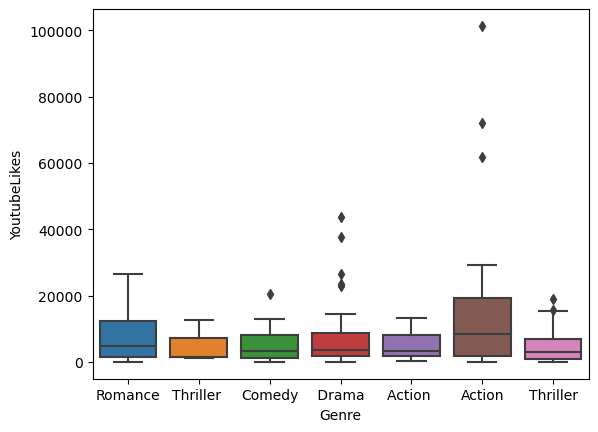

In [15]:
import seaborn as sns
print("BoxPlot for each genre is \n")
sns.boxplot(x="Genre",y="YoutubeLikes",data=df)

# 11.Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

YoutubeLikes and YoutubeDislikes seem to be highly correlated


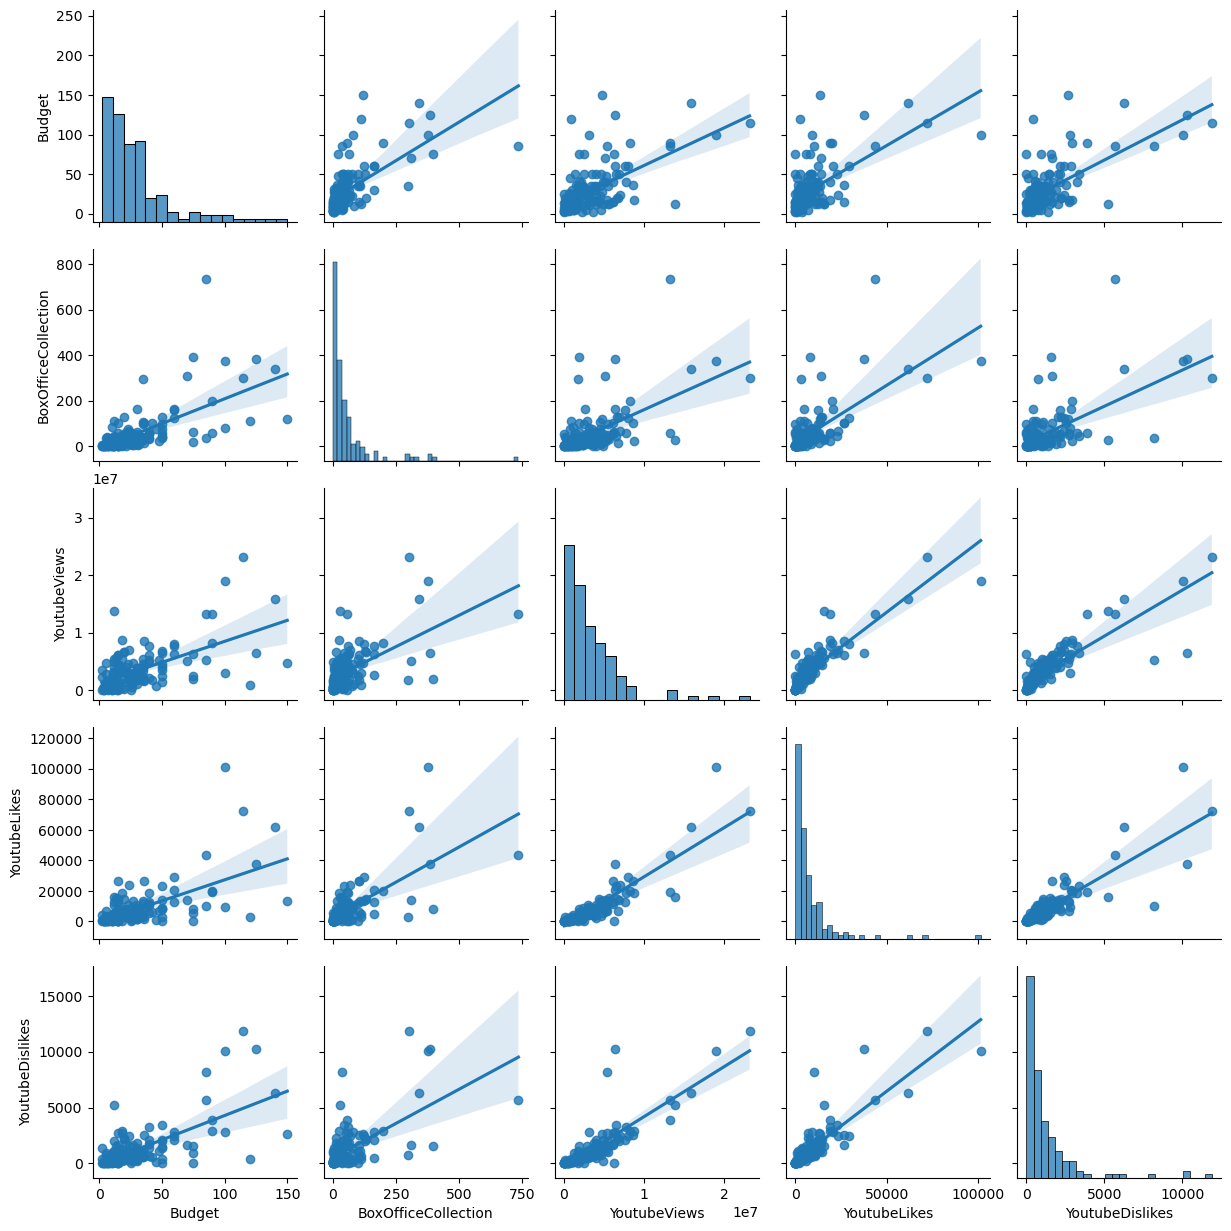

In [16]:
sns.pairplot(df[["Budget", "BoxOfficeCollection", "YoutubeViews", "YoutubeLikes", "YoutubeDislikes"]], kind='reg')
print("YoutubeLikes and YoutubeDislikes seem to be highly correlated")

In [17]:
print("we can also analysize it this way also \n")
df[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr()

we can also analysize it this way also 



,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


# 12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

<AxesSubplot:xlabel='Year', ylabel='BoxOfficeCollection'>

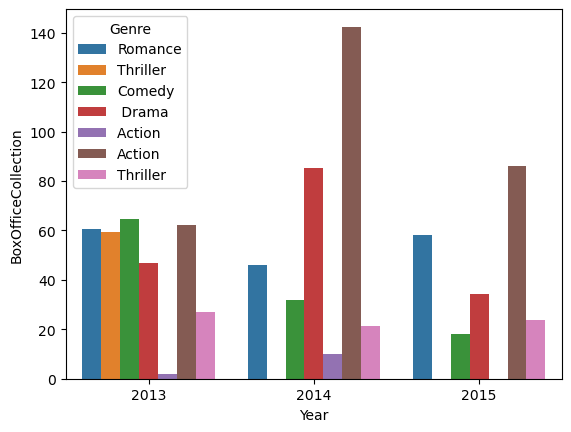

In [62]:
sns.barplot(x='Year', y='BoxOfficeCollection', hue='Genre', data=df, ci=None)

# 13. Visualize the Budget and Box office collection based on Genre.

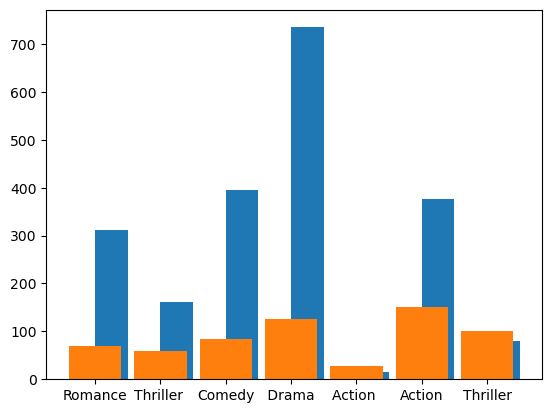

In [53]:
plt.bar(df["Genre"],df["BoxOfficeCollection"],align='edge',width=0.5,label="BoxofficeCollection")
plt.bar(df["Genre"],df["Budget"],label="Budget")
plt.legend
plt.show()

# 14. Find the distribution of movie budget for every Genre.

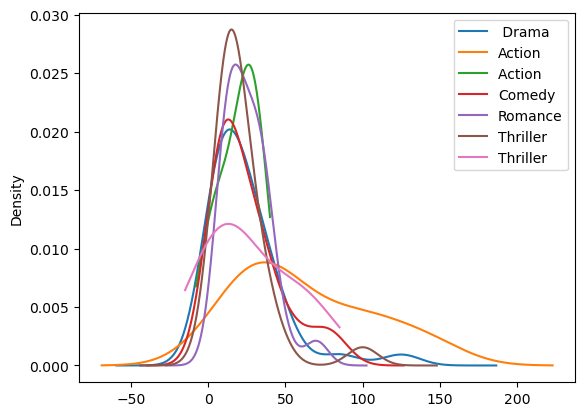

In [51]:
df.groupby('Genre')["Budget"].plot(kind='density')
plt.legend()
plt.show()

# 15.During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph

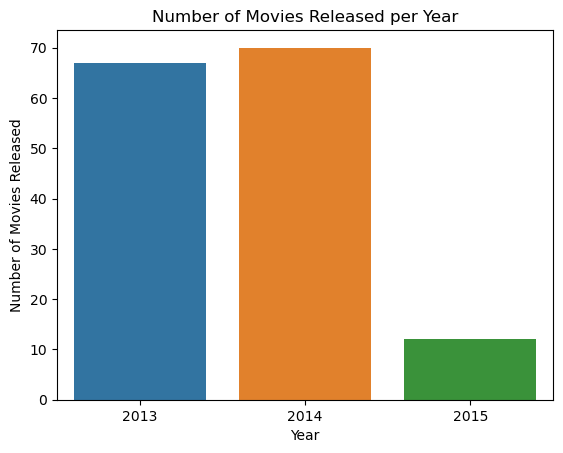

In [49]:
from datetime import datetime
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['Release Date'] = pd.to_datetime(df['Release Date'])
temp_df = pd.DataFrame(df['Release Date'].dt.year.value_counts())
temp_df = temp_df.reset_index()
temp_df.columns = ['Year', 'Movie Count']
sns.barplot(x='Year', y='Movie Count', data=temp_df)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')
plt.show()
